# Image Classification using Deep CNN

**Setup and load data**

**1. Install Dependencies and Setup**

In [ ]:
#!pip install tensorflow-gpu==2.11.0

In [ ]:
import tensorflow as tf
import os

In [ ]:
#! pip list

In [ ]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

**limited our memory growth:** This code comment suggests that to prevent Out of Memory (OOM) errors when training machine learning models on a GPU, it is recommended to adjust the GPU memory consumption growth. This can be achieved by configuring the TensorFlow or PyTorch framework to allocate only a certain amount of memory, and to increase memory allocation incrementally as needed during model training. By doing so, the GPU memory usage can be better managed, and the likelihood of encountering OOM errors can be reduced.

# 2. Remove dodgy images


In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
data_dir = '/content/drive/MyDrive/emotion 1' 

In [ ]:
#!rm -r /content/data/__MACOSX

In [ ]:
os.listdir(data_dir)

['happy', 'sad']

In [ ]:
os.listdir(os.path.join(data_dir, 'happy'))

['dv2051009.jpg',
 'unsplash_528b27288f41f_1.JPG2.jpg',
 'Untitled-design-65.png',
 'happy-too-happy.gif',
 '170711-better-work-motivation-ed-337p.jpg',
 'bigstock_Happy_Business_People_With_Han_4049346.jpg',
 'pexels-photo-1999504.jpeg',
 'shutterstock_1123160147.jpg',
 'photo-1537511446984-935f663eb1f4.jpg',
 'image34.png',
 'A_Sep20_14_1189155141.jpg',
 'physed-happiness-videoSixteenByNineJumbo1600.jpg',
 'photo-1517486808906-6ca8b3f04846.jpg',
 '171120-smile-stock-njs-333p.jpg',
 'photo-1542596594-649edbc13630.jpg',
 'sn-seniors.jpg',
 'photo-1491438590914-bc09fcaaf77a.jpg',
 '212_mwrvfw.jpg',
 'pexels-photo-1498332.jpeg',
 '_happy_jumping_on_beach-40815.jpg',
 'profile-fb-1488738201-d121ebe227c4.jpg',
 'VJdvLa-download-happy-blackman-png.png',
 'photo-1629726249040-850740a56c81.jpg',
 'GettyImages-871518740.jpg',
 'happy-baby-3-752x501.jpg',
 'profile-fb-1542000551-79df6d1d11fa.jpg',
 'photo-1573165706511-3ffde6ef1fe3.jpg',
 'nm-how-happiness-affects-health-tnail.jpg',
 'photo-154

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
image_exts[1]

'jpg'

In [ ]:
#for image_class in os.listdir(data_dir):#read file
  #for image in os.listdir(os.path.join(data_dir, image_class)): #read the single image in file
   # print (image)

In [ ]:
img = cv2.imread(os.path.join('/content/drive/MyDrive/emotion 1/sad/-unhappy-miss-good-chance-dressed-casually-isolated-yellow-wall_273609-37534.jpg'))
img.shape

(417, 626, 3)

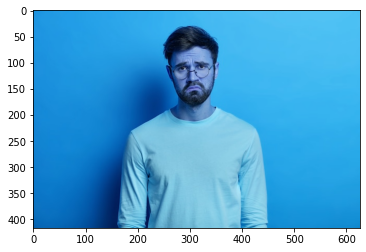

In [ ]:
plt.imshow(img)

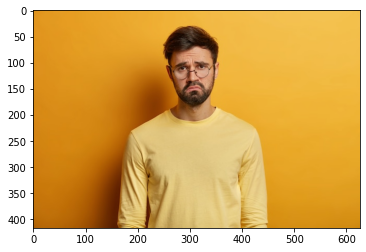

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /content/drive/MyDrive/emotion 1/happy/happy-too-happy.gif
Image not in ext list /content/drive/MyDrive/emotion 1/happy/happiness-overview-guide-1440x810.jpg
Image not in ext list /content/drive/MyDrive/emotion 1/happy/.DS_Store
Image not in ext list /content/drive/MyDrive/emotion 1/happy/guilherme-stecanella-375176-unsplash.jpg
Image not in ext list /content/drive/MyDrive/emotion 1/happy/happy-business-man-woman-jumping-600w-168748874.jpg
Image not in ext list /content/drive/MyDrive/emotion 1/happy/427394C200000578-0-image-a-24_1500384481554.jpg
Image not in ext list /content/drive/MyDrive/emotion 1/happy/5b9e7d542100003100c5f33e.jpeg
Image not in ext list /content/drive/MyDrive/emotion 1/sad/84725936-sad-man-sitting-on-stairs-in-the-park.jpg
Image not in ext list /content/drive/MyDrive/emotion 1/sad/v4-460px-Make-a-Sad-Person-Happy-Step-2.jpg.webp
Image not in ext list /content/drive/MyDrive/emotion 1/sad/.DS_Store
Image not in ext list /content/drive/MyDrive/em

# 3. Load Data

In [ ]:
#tf.data.Dataset??

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#tf.keras.utils.image_dataset_from_directory??

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 203 files belonging to 2 classes.


In [ ]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator = data.as_numpy_iterator() #creates an iterator that allows you to iterate over the batches of data in a TensorFlow

In [ ]:
data_iterator

In [ ]:
# Get another from iterator
batch = data_iterator.next()#next() method on the iterator object to get the next batch

In [ ]:
len(batch)

2

there is **two part** of dataset, there is **images** and there is the **labels**

In [ ]:
#images represented as numoy arrays
batch[0].shape #images (number of image, image size,3 color channels (RGB))

(32, 256, 256, 3)

In [ ]:
#label
# CLASS 1 = DOG
# CLASS 0 = CAT
batch[1]

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int32)

which class belong to which number?

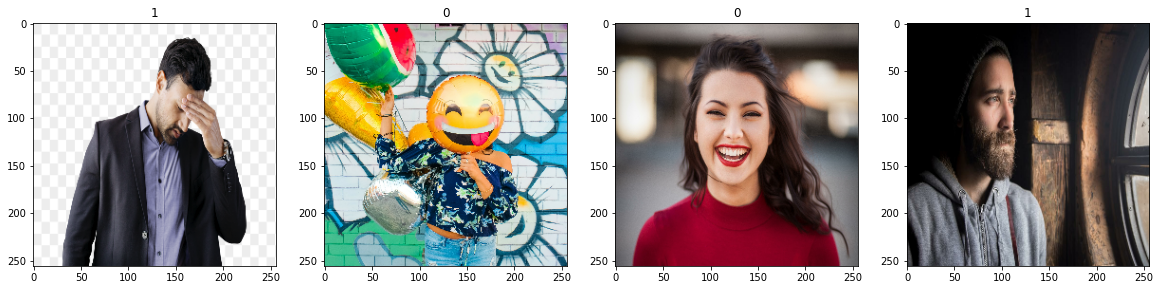

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
#is a NumPy array containing a batch of images, each with pixel values ranging from 0 to 255
#batch[0].min()
#batch[0].max()

# 2. preprocess Data

2.1 Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y)) #x=imgs, y=target variable
data

<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
scaled_iterator = data.as_numpy_iterator() 
scaled_iterator.next()[0].max()

1.0

2.1 Split Data

In [ ]:
len(data)

7

In [ ]:
train_size = int(len(data)*0.8)
val_size = int(len(data)*0.1)+1
test_size = int(len(data)*0.1)+1

In [ ]:
test_size

1

In [ ]:
train_size +val_size+ test_size

7

In [ ]:
train = data.take(train_size) #how much data we are going to take from the particular partition
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(test)

1

# 3.Build Deep Learning Model 

# 3.1 DEEP LEARNING MODEL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D()) #it takes max value of relue activation

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu')) #adds a fully connected layer with 256 neurons and applies the ReLU activation function to the output. 
model.add(Dense(1, activation='sigmoid')) #generate the output 0 and 1 which is correspond to cat and dog

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
#tf.optimizers.

In [ ]:
model.summary() #how model transform our data

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 30, 30, 16)      

In [ ]:
30*30*16

14400

# 3.2 Train

In [ ]:
logdir='train face'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 12s 1s/step - loss: 1.1428 - accuracy: 0.5437 - val_loss: 0.6599 - val_accuracy: 0.5938
Epoch 2/20
5/5 [==============================] - 8s 972ms/step - loss: 0.6928 - accuracy: 0.5250 - val_loss: 0.6865 - val_accuracy: 0.7188
Epoch 3/20
5/5 [==============================] - 9s 1s/step - loss: 0.6885 - accuracy: 0.7000 - val_loss: 0.6841 - val_accuracy: 0.7812
Epoch 4/20
5/5 [==============================] - 7s 957ms/step - loss: 0.6733 - accuracy: 0.6812 - val_loss: 0.6126 - val_accuracy: 0.6562
Epoch 5/20
5/5 [==============================] - 9s 1s/step - loss: 0.6432 - accuracy: 0.6313 - val_loss: 0.5868 - val_accuracy: 0.8438
Epoch 6/20
5/5 [==============================] - 11s 1s/step - loss: 0.6186 - accuracy: 0.6625 - val_loss: 0.5866 - val_accuracy: 0.7812
Epoch 7/20
5/5 [==============================] - 9s 1s/step - loss: 0.5373 - accuracy: 0.7937 - val_loss: 0.4225 - val_accuracy: 0.8750
Epoch 8/20
5/5 [=================

In [ ]:
#hist.history

# 3.3 Plot Performance

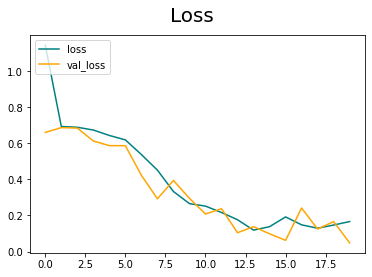

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


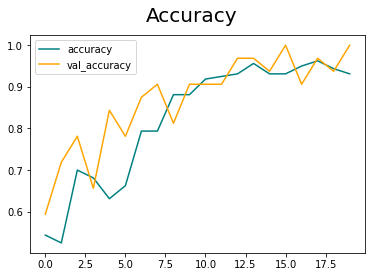

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate performance

# 4.1 Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
len(test)

1

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch #x= set of images y=true value
    yhat = model.predict(X) # return back a set of value between 0 and 1
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 107ms/step


In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


# 4.2 Test

In [ ]:
import cv2

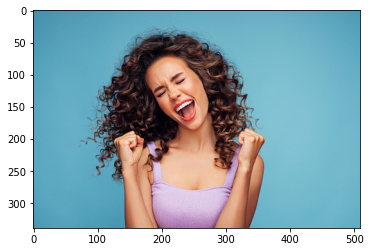

In [711]:
img = cv2.imread('/content/drive/MyDrive/happy .jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

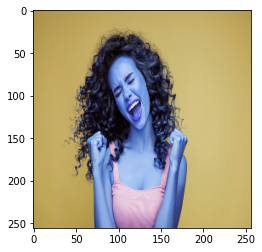

In [712]:
resize = tf.image.resize(img, (256,256)) #we need for passing through our neural network to be (256,256)
plt.imshow(resize.numpy().astype(int))
plt.show()

In [713]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 21ms/step


In [714]:
yhat

array([[0.46597725]], dtype=float32)

In [715]:
 if yhat > 0.5: 
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is happy


# 5. Save the Model

In [697]:
from tensorflow.keras.models import load_model

In [698]:
model.save(os.path.join('/content/drive/MyDrive/models/happysad model','happysadmodel.h5'))

In [699]:
new_model = load_model('/content/drive/MyDrive/models/happysad model/happysadmodel.h5')

In [700]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 147ms/step


In [716]:
if yhat_new > 0.5: 
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is happy
